<a href="https://colab.research.google.com/github/saisampaththumati-datascientists/Angular_ML_Model/blob/main/Regression_Model_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from torch import nn

In [134]:
df = pd.read_csv("/content/insurance 2.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [135]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [137]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [138]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [139]:
df=pd.get_dummies(df,columns=["sex","smoker","region"],dtype=float)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [140]:
df["age"]= df["age"].astype(float)
df["children"]= df["children"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   float64
 5   sex_male          1338 non-null   float64
 6   smoker_no         1338 non-null   float64
 7   smoker_yes        1338 non-null   float64
 8   region_northeast  1338 non-null   float64
 9   region_northwest  1338 non-null   float64
 10  region_southeast  1338 non-null   float64
 11  region_southwest  1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


In [141]:
X=df.drop("charges",axis=1)
Y=df["charges"]
x_train,x_test,y_train,y_test= train_test_split(X,Y,shuffle=True,random_state=1,test_size=0.30)
x_train.shape,x_test.shape

((936, 11), (402, 11))

In [142]:
x_train=torch.Tensor(x_train.values)
x_test=torch.Tensor(x_test.values)

In [143]:
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

In [144]:
# create the Linear model
class Linear_model(nn.Module):
   def __init__(self,input=11,h1=15,h2=9,h3=3,output=1):
    super().__init__()
    self.FC1= nn.Linear(input,h1)
    self.FC2=nn.Linear(h1,h2)
    self.FC3=nn.Linear(h2,h3)
    self.Output=nn.Linear(h3,output)
    self.dropout = nn.Dropout(p=0.5)
   def forward(self,x):
    x=F.leaky_relu(self.FC1(x))
    x=self.dropout(x)
    x=F.leaky_relu(self.FC2(x))
    x=self.dropout(x)
    x=F.leaky_relu(self.FC3(x))
    x=self.dropout(x)
    x=(self.Output(x))
    return x


In [145]:
model = Linear_model()

In [146]:
## creating the epoch and running the model
epochs =500
training_val =[]
testing_val=[]
epochs_step=[]
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)
for epoch in range(epochs):
  model.train()
  y_predict_train=model(x_train)
  loss=loss_fn(y_predict_train,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #scheduler.step()
  model.eval()
  with torch.inference_mode():
    y_predict_test= model(x_test)
    loss_final= loss_fn(y_predict_test,y_test)
  if epoch %10==0:
    epochs_step.append(epoch)
    testing_val.append(loss_final.detach().numpy())
    training_val.append(loss.detach().numpy())
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {loss_final}")

Epoch: 0 | Train loss: 13274.71484375 | Test loss: 13254.2431640625
Epoch: 10 | Train loss: 13273.802734375 | Test loss: 13253.5732421875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([936])) that is different to the input size (torch.Size([936, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([402])) that is different to the input size (torch.Size([402, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 20 | Train loss: 13272.7021484375 | Test loss: 13252.76953125
Epoch: 30 | Train loss: 13271.5302734375 | Test loss: 13251.6875
Epoch: 40 | Train loss: 13270.3046875 | Test loss: 13250.115234375
Epoch: 50 | Train loss: 13268.119140625 | Test loss: 13247.80078125
Epoch: 60 | Train loss: 13264.58203125 | Test loss: 13244.505859375
Epoch: 70 | Train loss: 13260.48046875 | Test loss: 13240.0302734375
Epoch: 80 | Train loss: 13255.890625 | Test loss: 13234.001953125
Epoch: 90 | Train loss: 13248.7236328125 | Test loss: 13225.828125
Epoch: 100 | Train loss: 13237.9609375 | Test loss: 13214.498046875
Epoch: 110 | Train loss: 13222.328125 | Test loss: 13199.1533203125
Epoch: 120 | Train loss: 13206.462890625 | Test loss: 13178.6630859375
Epoch: 130 | Train loss: 13178.609375 | Test loss: 13151.751953125
Epoch: 140 | Train loss: 13143.9892578125 | Test loss: 13116.9462890625
Epoch: 150 | Train loss: 13110.021484375 | Test loss: 13071.7626953125
Epoch: 160 | Train loss: 13048.72265625 | Te

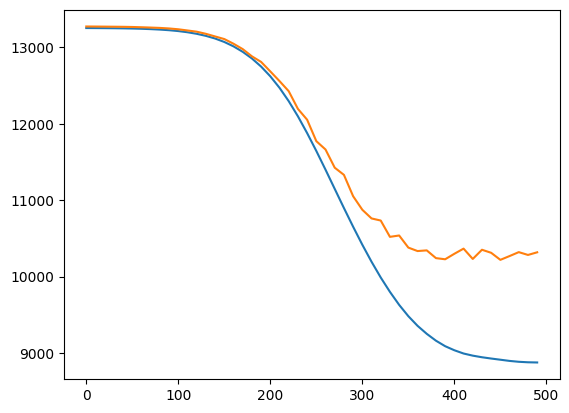

In [147]:
import matplotlib.pyplot as plt
plt.plot(epochs_step,testing_val)
plt.plot(epochs_step,training_val)


In [155]:
model.eval()
y_predict= model(x_test)
y_predict.shape

torch.Size([402, 1])

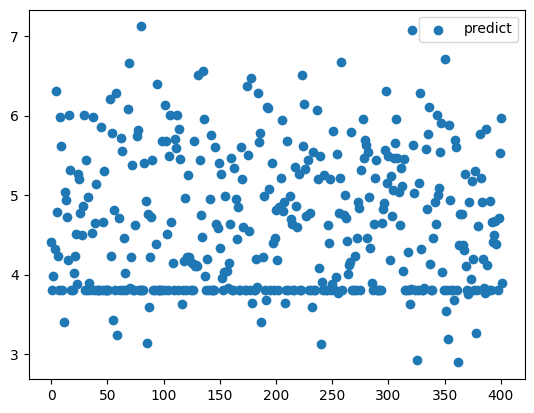

In [156]:


plt.scatter(x=range(y_predict.shape[0]),y=y_predict.detach().numpy(),label="predict")
plt.legend()